
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1kOWHDDPiUkXA419-aF8mhhBE9nt6e210?usp=sharing)

In [1]:
!pip install transformers torch pillow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.7 MB/s eta 0:00:00


In [ ]:
!pip install transformers torch torchvision pillow matplotlib -q

In [ ]:
import torch
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import matplotlib.pyplot as plt
from io import BytesIO
from transformers import CLIPProcessor, CLIPModel

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

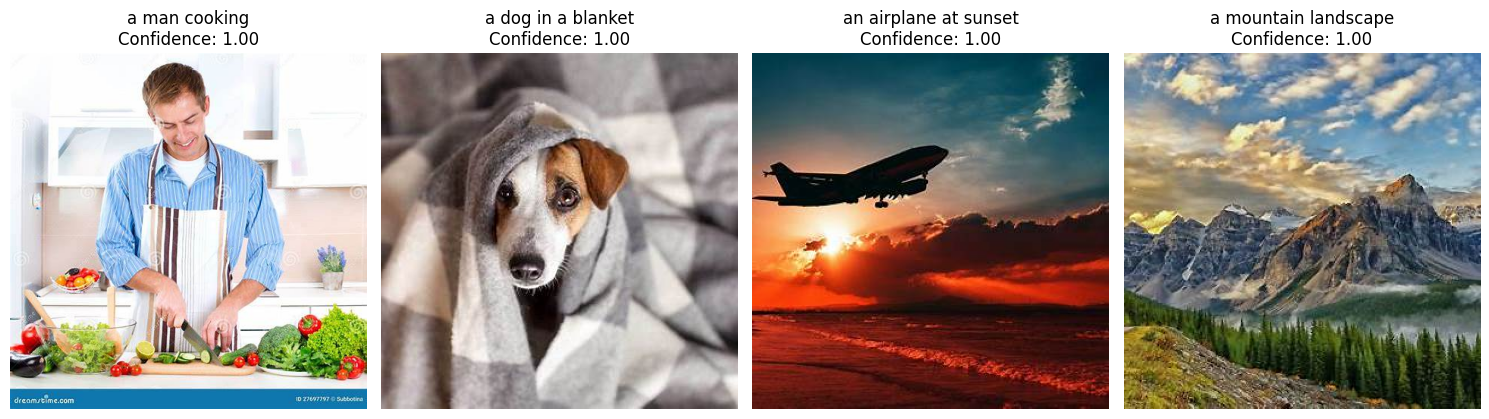

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load CLIP model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define local image file paths
image_paths = [
    "/content/Man cooking.jpg",
    "/content/Dog in blanket.jpg",
    "/content/Airplane in sunset.jpg",
    "/content/Mountains.jpg"
]

# Define candidate labels
candidate_labels = [
    "a man cooking",
    "a dog in a blanket",
    "an airplane at sunset",
    "a mountain landscape",
    "a cup of coffee"
]

# Load and process images
images = []
for path in image_paths:
    try:
        img = Image.open(path).convert("RGB")
        images.append(img)
    except Exception as e:
        print(f"Error loading image {path}: {e}")

# Perform zero-shot classification
results = []
for img in images:
    inputs = clip_processor(text=candidate_labels, images=img, return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        outputs = clip_model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)
    pred_idx = probs.argmax().item()
    pred_label = candidate_labels[pred_idx]
    confidence = probs[0][pred_idx].item()
    results.append((img, pred_label, confidence))

# Display results
plt.figure(figsize=(15, 5))
for i, (img, label, conf) in enumerate(results):
    plt.subplot(1, len(results), i + 1)
    plt.imshow(img)
    plt.title(f"{label}\nConfidence: {conf:.2f}")
    plt.axis("off")
plt.tight_layout()
plt.show()


--- Diabetes Dataset Exploration ---
Features: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

First 5 rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  progression  
0 -0.002592  0.019907 -0.017646        151.0  
1 -0.039493 -0.068332 -0.092204         75.0  
2 -0.002592  0.002861 -0.025930        141.0  
3  0.034309  0.022688 -0.009362        206.0  
4 -0.002592 -0.031988 -0.046641        135.0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   C

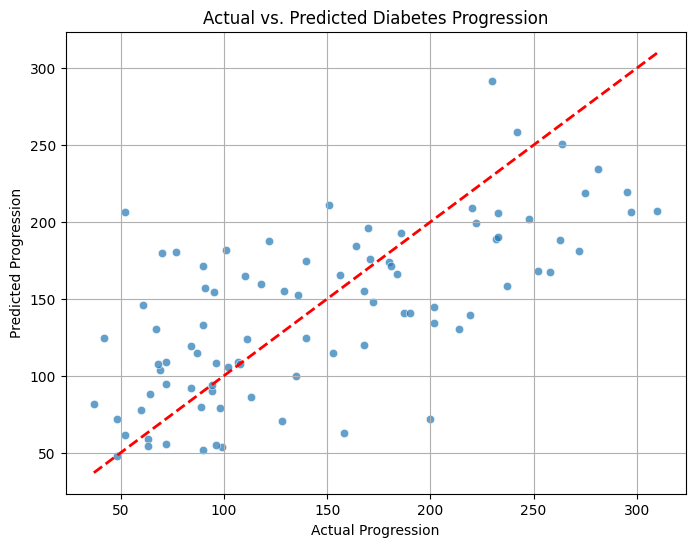


--- Example Prediction ---
Sample features: [ 0.04534098 -0.04464164 -0.00620595 -0.01599898  0.1250187   0.1251981
  0.019187    0.03430886  0.03243232 -0.0052198 ]
True progression value: 219.00
Predicted progression value: 139.55


In [3]:
# 2. Tabular Regression: Diabetes Dataset

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Convert to a Pandas DataFrame for easier exploration (optional)
df = pd.DataFrame(X, columns=feature_names)
df['progression'] = y

print("--- Diabetes Dataset Exploration ---")
print(f"Features: {feature_names}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
df.info()
print("\nDescriptive statistics of target (progression):")
print(df['progression'].describe())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Initialize and train the Linear Regression model
model = LinearRegression()
print("\nTraining the Linear Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n--- Model Evaluation ---")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2 Score): {r2:.4f}")

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(feature_names, model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Plotting predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='w', linewidth=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2) # Diagonal line
plt.xlabel("Actual Progression")
plt.ylabel("Predicted Progression")
plt.title("Actual vs. Predicted Diabetes Progression")
plt.grid(True)
plt.show()

# Example prediction
print("\n--- Example Prediction ---")
sample_idx = 0
sample_features = X_test[sample_idx].reshape(1, -1) # Reshape for single prediction
sample_true_value = y_test[sample_idx]
sample_pred_value = model.predict(sample_features)[0]

print(f"Sample features: {X_test[sample_idx]}") # Original shape for display
print(f"True progression value: {sample_true_value:.2f}")
print(f"Predicted progression value: {sample_pred_value:.2f}")

--- Wine Dataset Exploration ---
Features: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target (true class) names: ['class_0' 'class_1' 'class_2']

First 5 rows of the dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26  

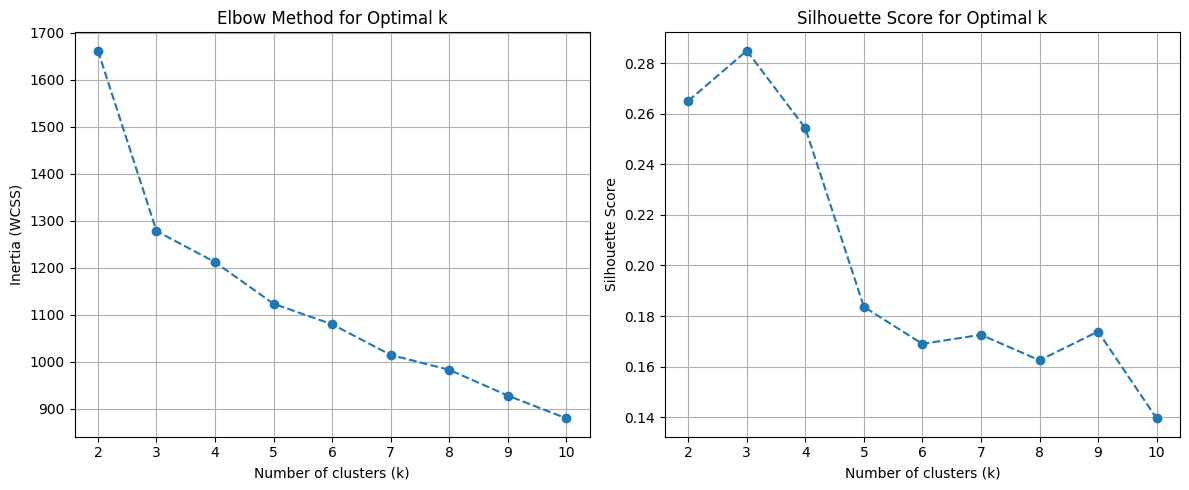


Selected optimal k: 3

--- Clustering Results ---
First 5 rows with cluster assignments:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82

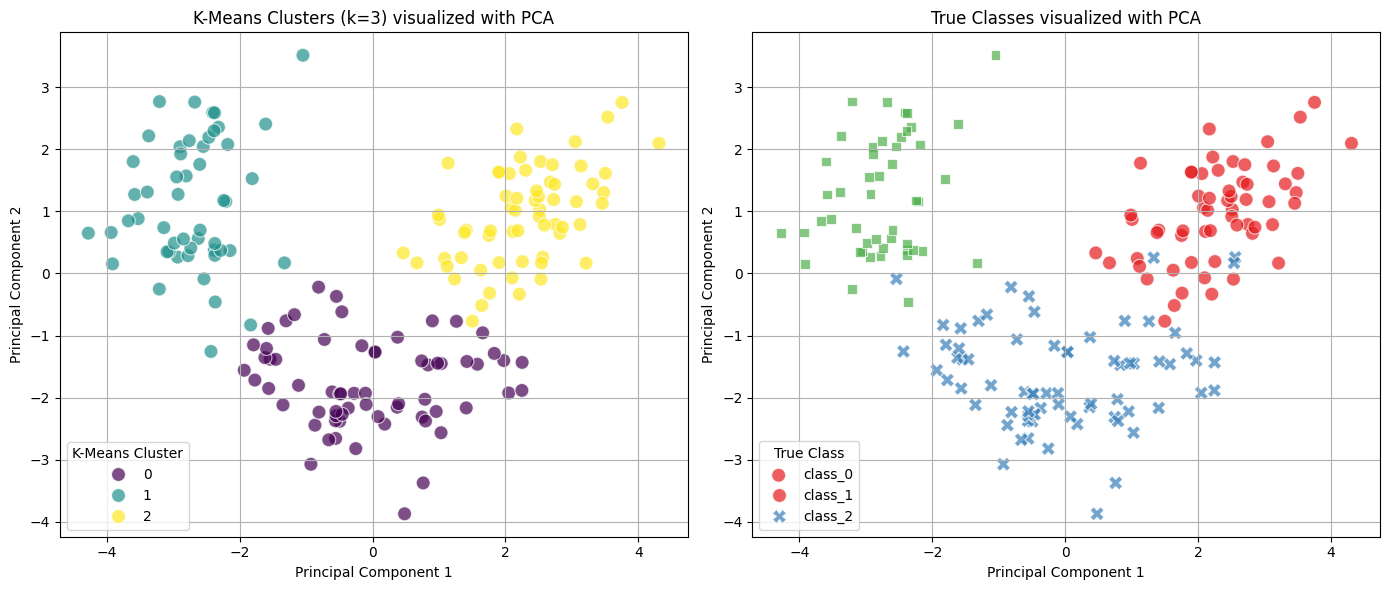


Cluster centroids in PCA space (if visualized):
[[-0.03695661 -1.77223945]
 [-2.72003575  1.12565126]
 [ 2.2761936   0.93205403]]


In [4]:
# 3. Tabular Clustering: Wine Dataset

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target # True labels, for comparison/evaluation, not used in clustering itself
feature_names = wine.feature_names
target_names = wine.target_names # Names of the true classes

# Convert to a Pandas DataFrame for easier exploration (optional)
df = pd.DataFrame(X, columns=feature_names)
df['true_class'] = y
df['true_class_name'] = df['true_class'].apply(lambda x: target_names[x])

print("--- Wine Dataset Exploration ---")
print(f"Features: {feature_names}")
print(f"Target (true class) names: {target_names}")
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Standardize the features
# K-Means is sensitive to feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nFeatures scaled.")

# Determine the optimal number of clusters using the Elbow Method and Silhouette Score
print("\nDetermining optimal number of clusters...")
inertia_values = []
silhouette_scores = []
k_range = range(2, 11) # Test k from 2 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)
    if k > 1: # Silhouette score requires at least 2 clusters
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o', linestyle='--')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Optimal k")
plt.grid(True)
plt.tight_layout()
plt.show()

# Based on the plots, choose an optimal k (often where the elbow occurs or silhouette score is highest)
# The Wine dataset has 3 true classes, so k=3 is expected to be a good choice.
optimal_k = 3
print(f"\nSelected optimal k: {optimal_k}")

# Apply K-Means clustering with the chosen k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = kmeans.fit_predict(X_scaled)

df['kmeans_cluster'] = cluster_labels

print("\n--- Clustering Results ---")
print("First 5 rows with cluster assignments:")
print(df.head())
print("\nCluster distribution:")
print(df['kmeans_cluster'].value_counts().sort_index())

# Evaluate clustering (optional, using true labels for context if available)
# Note: K-Means is unsupervised, so direct comparison with true labels needs careful interpretation
# (e.g., using Adjusted Rand Index or Normalized Mutual Information if true labels are known)
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
if y is not None:
    ari = adjusted_rand_score(y, cluster_labels)
    nmi = normalized_mutual_info_score(y, cluster_labels)
    print(f"\nAdjusted Rand Index (ARI) comparing to true labels: {ari:.4f}")
    print(f"Normalized Mutual Information (NMI) comparing to true labels: {nmi:.4f}")

# Visualize the clusters using PCA for dimensionality reduction (to 2D)
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['kmeans_cluster'] = cluster_labels
if y is not None:
    df_pca['true_class'] = y

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x='PCA1', y='PCA2', hue='kmeans_cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title(f'K-Means Clusters (k={optimal_k}) visualized with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='K-Means Cluster')
plt.grid(True)

if y is not None:
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='PCA1', y='PCA2', hue='true_class', data=df_pca, palette='Set1', s=100, alpha=0.7, style='true_class', markers=True)
    plt.title('True Classes visualized with PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='True Class', labels=target_names) # Use target_names for legend
    plt.grid(True)

plt.tight_layout()
plt.show()

print("\nCluster centroids in PCA space (if visualized):")
centroids_pca = pca.transform(kmeans.cluster_centers_)
print(centroids_pca)

In [6]:
# 4. Text Classification: Sentiment Analysis on NLTK Movie Reviews

import nltk
from nltk.corpus import movie_reviews
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from nltk.tokenize import word_tokenize # Using word_tokenize for better tokenization
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt_tab')

# Download necessary NLTK resources (if not already downloaded)
try:
    movie_reviews.categories()
except LookupError:
    print("Downloading NLTK 'movie_reviews' corpus...")
    nltk.download('movie_reviews')
try:
    word_tokenize("test")
except LookupError:
    print("Downloading NLTK 'punkt' tokenizer...")
    nltk.download('punkt')
try:
    stopwords.words('english')
except LookupError:
    print("Downloading NLTK 'stopwords'...")
    nltk.download('stopwords')


# Prepare the dataset
documents = []
for category in movie_reviews.categories():
    for fileid in movie_reviews.fileids(category):
        documents.append((movie_reviews.raw(fileid), category))

# Shuffle the documents
random.seed(42)
random.shuffle(documents)

print(f"Total number of reviews: {len(documents)}")
print(f"First review text (snippet): {documents[0][0][:200]}...")
print(f"Sentiment of first review: {documents[0][1]}")

# Define a preprocessing function
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens, and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return " ".join(tokens)

# Preprocess and separate texts and labels
print("\nPreprocessing text data...")
texts = [preprocess_text(doc) for doc, category in documents]
labels = [category for doc, category in documents]

print(f"Example of preprocessed text (snippet): {texts[0][:200]}...")

# Split data into training and testing sets
X_train_text, X_test_text, y_train, y_test = train_test_split(texts, labels, test_size=0.25, random_state=42)

print(f"\nTraining set size: {len(X_train_text)}")
print(f"Testing set size: {len(X_test_text)}")

# Create TF-IDF features
print("\nVectorizing text data using TF-IDF...")
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2)) # Use up to 5000 features, include bi-grams
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

print(f"Shape of TF-IDF training matrix: {X_train_tfidf.shape}")
print(f"Shape of TF-IDF testing matrix: {X_test_tfidf.shape}")

# Initialize and train the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)
print("\nTraining the Logistic Regression model...")
model.fit(X_train_tfidf, y_train)
print("Model training complete.")

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=movie_reviews.categories())

print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Example prediction on new text
print("\n--- Example Prediction ---")
new_reviews = [
    "This movie was absolutely fantastic! The acting was superb and the plot was engaging.",
    "A complete waste of time. The storyline was boring and the characters were underdeveloped.",
    "It was an okay movie, not great but not terrible either. Some good moments."
]

print("New reviews:")
for review_text in new_reviews:
    print(f"- \"{review_text}\"")

preprocessed_new_reviews = [preprocess_text(review) for review in new_reviews]
new_reviews_tfidf = vectorizer.transform(preprocessed_new_reviews)
new_predictions = model.predict(new_reviews_tfidf)
new_pred_proba = model.predict_proba(new_reviews_tfidf)


print("\nPredictions for new reviews:")
for review_text, prediction, probas in zip(new_reviews, new_predictions, new_pred_proba):
    pos_proba = probas[model.classes_.tolist().index('pos')] # Probability of being positive
    neg_proba = probas[model.classes_.tolist().index('neg')] # Probability of being negative
    print(f"  Review: \"{review_text[:50]}...\"")
    print(f"  Predicted Sentiment: {prediction.upper()}")
    print(f"  Confidence (Pos): {pos_proba:.2f}, (Neg): {neg_proba:.2f}\n")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Total number of reviews: 2000
First review text (snippet): mr . bean , a bumbling security guard from england is sent to la to help with the grandiose homecoming of a masterpiece american painting . 
the first two words should have said enough to let you know...
Sentiment of first review: neg

Preprocessing text data...
Example of preprocessed text (snippet): mr bean bumbling security guard england sent la help grandiose homecoming masterpiece american painting first two words said enough let know occurs bean trip la look rather interesting odd ride heck d...

Training set size: 1500
Testing set size: 500

Vectorizing text data using TF-IDF...
Shape of TF-IDF training matrix: (1500, 5000)
Shape of TF-IDF testing matrix: (500, 5000)

Training the Logistic Regression model...
Model training complete.

--- Model Evaluation ---
Accuracy: 0.8240

Classification Report:
              precision    recall  f1-score   support

         neg       0.85      0.79      0.82       254
         pos  

Using device: cuda

Loading CIFAR-10 dataset...


100%|██████████| 170M/170M [00:13<00:00, 12.5MB/s]


Dataset loaded.

Displaying example training images...


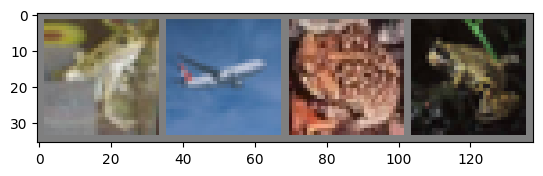

Labels:  frog  plane frog  frog 
Net(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=512, bias=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=128, bias=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

Training the CNN model...
Epoch [1/15], Step [100/782], Loss: 1.8835
Epoch [1/15], Step [200/782], Loss: 1.5170
Epoch [1/15], Step [300/782], Loss: 1.6989
Epoch [1/15], Step [400/782], Loss: 1.152

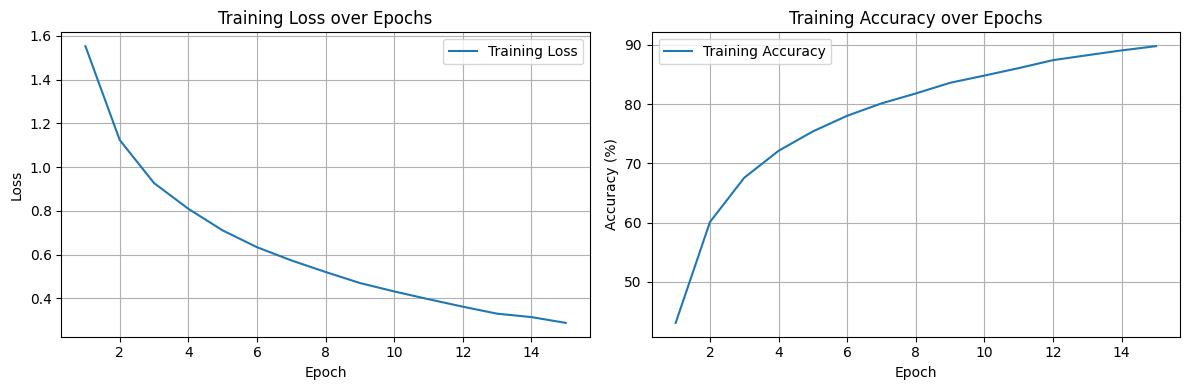


--- Model Evaluation ---
Accuracy of the network on the 10000 test images: 75.67 %

Per-class accuracy:
Accuracy of plane : 84.50 %
Accuracy of car   : 86.90 %
Accuracy of bird  : 69.50 %
Accuracy of cat   : 52.60 %
Accuracy of deer  : 72.60 %
Accuracy of dog   : 64.60 %
Accuracy of frog  : 85.30 %
Accuracy of horse : 76.10 %
Accuracy of ship  : 84.50 %
Accuracy of truck : 80.10 %

--- Example Predictions on Test Images ---


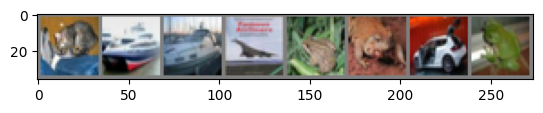

GroundTruth:  cat   ship  ship  plane frog  frog  car   frog 
Predicted:    cat   ship  ship  plane frog  frog  cat   bird 


In [8]:
# 6. Image Classification: CIFAR-10 with PyTorch/Torchvision

import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Device configuration (use GPU if available)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Define transformations for the CIFAR-10 dataset
# Normalize pixel values to be between -1 and 1
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # Mean and std for 3 channels
])

# Hyperparameters
batch_size = 64 # Increased batch size for potentially faster training
learning_rate = 0.001
num_epochs = 15 # Increased epochs for better convergence

# Load CIFAR-10 training and test datasets
print("\nLoading CIFAR-10 dataset...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2) # num_workers for parallel loading

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
print("Dataset loaded.")

# Define the classes in CIFAR-10
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# Function to show an image (for visualization)
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize (from [-1,1] to [0,1])
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) # Convert from (C, H, W) to (H, W, C)
    plt.show()

# Get some random training images to display
print("\nDisplaying example training images...")
dataiter = iter(trainloader)
images, labels = next(dataiter) # Use next(dataiter) instead of dataiter.next() for Python 3
# Show images
imshow(torchvision.utils.make_grid(images[:4])) # Show first 4 images from the batch
# Print labels
print('Labels: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


# Define a simple Convolutional Neural Network (CNN)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input: 3x32x32
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1) # Output: 32x32x32
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)     # Output: 32x16x16
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)# Output: 64x16x16
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)     # Output: 64x8x8
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)# Output: 128x8x8
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)     # Output: 128x4x4

        # Fully connected layers
        self.fc1 = nn.Linear(128 * 4 * 4, 512) # 128 channels * 4x4 image size
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 128)
        self.dropout2 = nn.Dropout(0.3)
        self.fc3 = nn.Linear(128, 10) # 10 output classes

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.pool3(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4) # Flatten the tensor for FC layers
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x) # Raw scores (logits), CrossEntropyLoss will apply softmax
        return x

model = Net().to(device) # Move model to GPU if available
model.summary = lambda: print(model) # Simple summary
model.summary()

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss() # Combines LogSoftmax and NLLLoss
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
print("\nTraining the CNN model...")
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    model.train() # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    for i, (images, labels) in enumerate(trainloader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # Zero the parameter gradients
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted_train = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

        if (i + 1) % 100 == 0: # Print progress every 100 mini-batches
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {loss.item():.4f}')

    epoch_loss = running_loss / len(trainloader)
    epoch_acc = 100 * correct_train / total_train
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    print(f'Epoch [{epoch+1}/{num_epochs}] completed. Training Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_acc:.2f}%')

print("Model training complete.")

# Plot training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Evaluate the model on the test set
print("\n--- Model Evaluation ---")
model.eval() # Set model to evaluation mode (important for layers like Dropout, BatchNorm)
with torch.no_grad(): # Disable gradient calculation during evaluation
    correct_test = 0
    total_test = 0
    all_labels = []
    all_predictions = []
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted_test = torch.max(outputs.data, 1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted_test.cpu().numpy())

test_accuracy = 100 * correct_test / total_test
print(f'Accuracy of the network on the {total_test} test images: {test_accuracy:.2f} %')

# Per-class accuracy
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for images, labels in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(labels)): # Iterate over batch size (can be less than defined batch_size for last batch)
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print("\nPer-class accuracy:")
for i in range(10):
    if class_total[i] > 0:
        print(f'Accuracy of {classes[i]:5s} : {100 * class_correct[i] / class_total[i]:.2f} %')
    else:
        print(f'Accuracy of {classes[i]:5s} : N/A (no samples)')


# Display some example predictions
print("\n--- Example Predictions on Test Images ---")
dataiter_test = iter(testloader)
images_test, labels_test = next(dataiter_test)
images_to_show = images_test[:8].to(device) # Show first 8 images from a batch
labels_to_show = labels_test[:8]

outputs_test = model(images_to_show)
_, predicted_labels_test = torch.max(outputs_test, 1)

imshow(torchvision.utils.make_grid(images_to_show.cpu())) # Move to CPU for imshow
print('GroundTruth: ', ' '.join(f'{classes[labels_to_show[j]]:5s}' for j in range(8)))
print('Predicted:   ', ' '.join(f'{classes[predicted_labels_test[j]]:5s}' for j in range(8)))


--- CO2 Dataset Exploration ---
Original data structure:
              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4

Data info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 1958-03-29 to 2001-12-29
Freq: W-SAT
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   co2     2225 non-null   float64
dtypes: float64(1)
memory usage: 35.7 KB

Monthly CO2 data (after resampling and interpolation):
1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01    316.529167
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64
Time range: 1958-03-01 00:00:00 to 2001-12-01 00:00:00


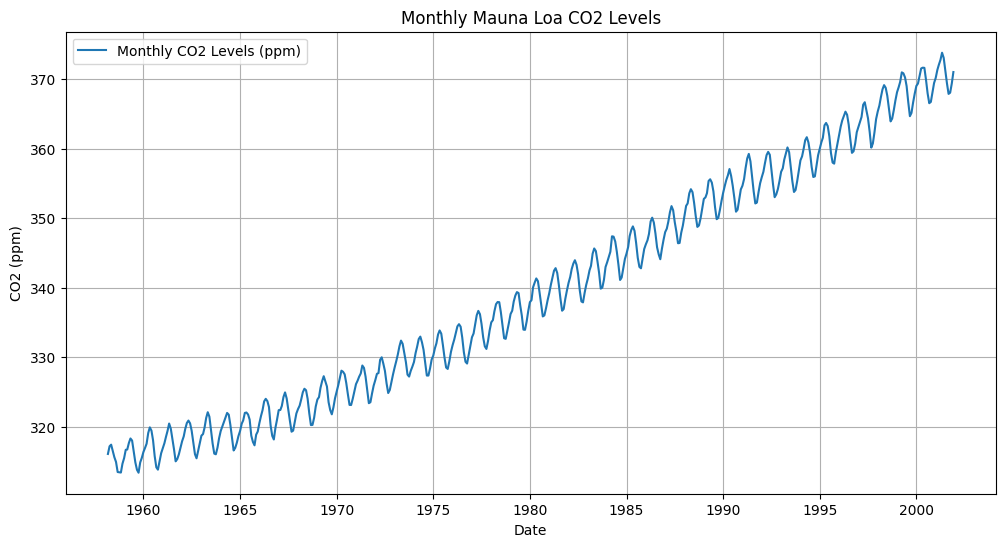


Performing time series decomposition...


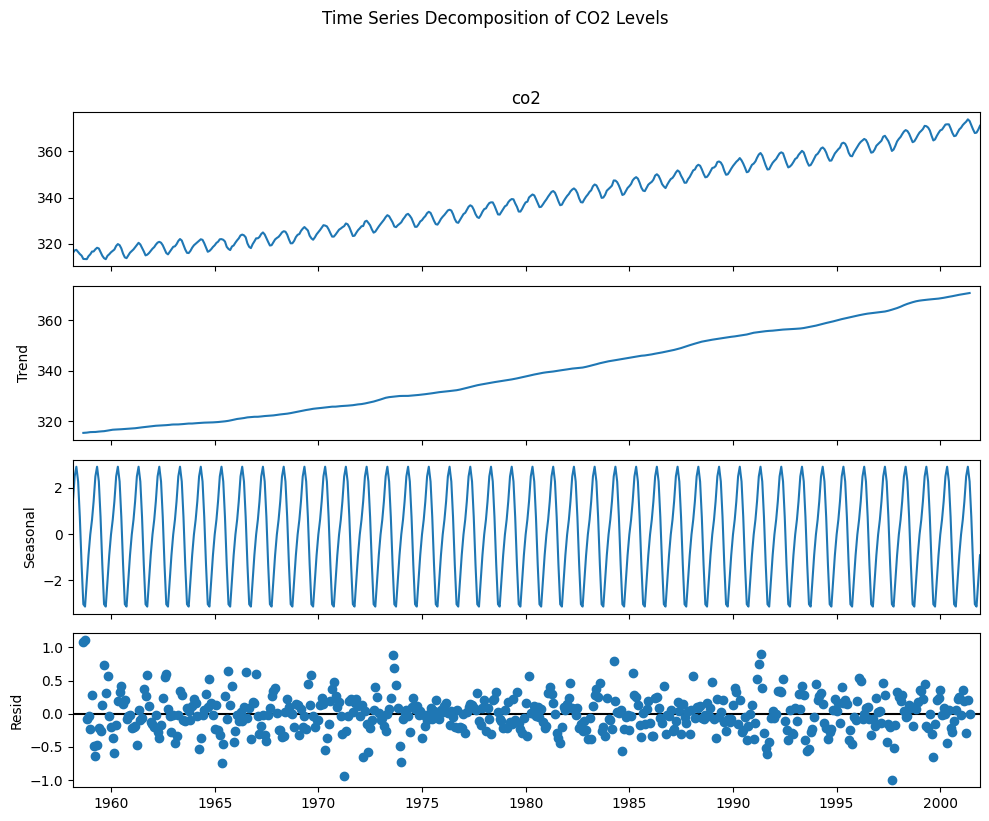


Training data size: 478
Test data size: 48

Fitting ARIMA model...
                               SARIMAX Results                                
Dep. Variable:                    co2   No. Observations:                  478
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -499.362
Date:                Thu, 15 May 2025   AIC                           1010.725
Time:                        09:21:14   BIC                           1035.730
Sample:                    03-01-1958   HQIC                          1020.557
                         - 12-01-1997                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8662      0.049     17.541      0.000       0.769       0.963
ar.L2         -0.1826      0.072     -2.531      0.011      -0.

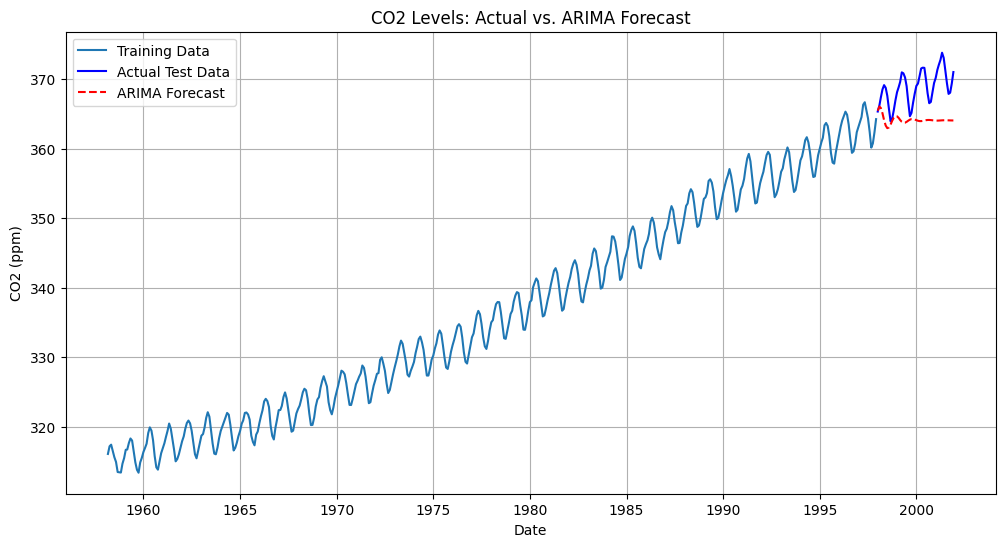


Forecasting future values (next 12 months)...


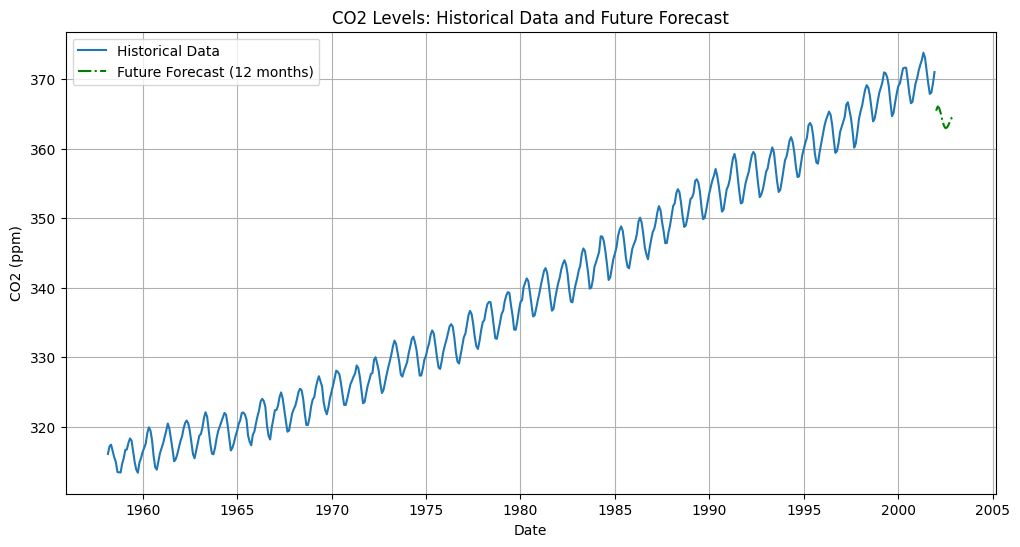

Future forecast values:
1998-01-01    365.460232
1998-02-01    366.069956
1998-03-01    365.848253
1998-04-01    365.086745
1998-05-01    364.098660
1998-06-01    363.321309
1998-07-01    362.952706
1998-08-01    363.049479
1998-09-01    363.470699
1998-10-01    364.014309
1998-11-01    364.463778
1998-12-01    364.687501
Freq: MS, Name: predicted_mean, dtype: float64


In [9]:
# 7. Time Series Analysis: CO2 Levels with Statsmodels

import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the Mauna Loa CO2 dataset
data_loader = sm.datasets.co2.load_pandas()
co2_data_raw = data_loader.data # This is a pandas DataFrame with a DatetimeIndex

print("--- CO2 Dataset Exploration ---")
print("Original data structure:")
print(co2_data_raw.head())
print("\nData info:")
co2_data_raw.info()

# The 'co2' column contains weekly CO2 measurements. It might have NaNs.
# Resample to monthly frequency for smoother analysis and ARIMA modeling,
# and interpolate missing values. Using 'MS' for Month Start frequency.
co2_data_monthly = co2_data_raw['co2'].resample('MS').mean()
co2_data_monthly = co2_data_monthly.interpolate(method='linear') # Interpolate NaNs

# Remove any remaining NaNs at the beginning or end after resampling/interpolation
co2_data_monthly.dropna(inplace=True)

print("\nMonthly CO2 data (after resampling and interpolation):")
print(co2_data_monthly.head())
print(f"Time range: {co2_data_monthly.index.min()} to {co2_data_monthly.index.max()}")

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(co2_data_monthly.index, co2_data_monthly, label='Monthly CO2 Levels (ppm)')
plt.title('Monthly Mauna Loa CO2 Levels')
plt.xlabel('Date')
plt.ylabel('CO2 (ppm)')
plt.legend()
plt.grid(True)
plt.show()

# Time Series Decomposition (Trend, Seasonality, Residuals)
# Assuming an additive model and a yearly seasonality (period=12 for monthly data)
print("\nPerforming time series decomposition...")
decomposition = seasonal_decompose(co2_data_monthly, model='additive', period=12)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition of CO2 Levels', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout
plt.show()

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Remove NaNs from components for plotting or further analysis
trend.dropna(inplace=True)
seasonal.dropna(inplace=True)
residual.dropna(inplace=True)

# Basic Forecasting with ARIMA model
# (p,d,q) are the ARIMA order parameters.
# p: order of AR term, d: number of differencing, q: order of MA term
# For simplicity, we'll choose some common values, e.g., (5,1,0)
# Proper order selection often involves ACF/PACF plots and grid search.

# Split data into training and testing sets
# Let's use data up to end of 1997 for training, and predict 1998 onwards
train_data = co2_data_monthly[:'1997']
test_data = co2_data_monthly['1998':]

print(f"\nTraining data size: {len(train_data)}")
print(f"Test data size: {len(test_data)}")

if len(test_data) == 0:
    print("Not enough data for test set with current split. Adjusting split for demonstration.")
    # Fallback if dataset is too short after 1998
    split_point = int(len(co2_data_monthly) * 0.9)
    train_data = co2_data_monthly.iloc[:split_point]
    test_data = co2_data_monthly.iloc[split_point:]
    print(f"Adjusted training data size: {len(train_data)}")
    print(f"Adjusted test data size: {len(test_data)}")


if len(train_data) > 0 and len(test_data) > 0:
    print("\nFitting ARIMA model...")
    # A simple ARIMA(5,1,0) model.
    # (p=5: autoregressive lags, d=1: one order of differencing for stationarity, q=0: no moving average terms)
    # For seasonal data, SARIMA is often better, but ARIMA is simpler for this example.
    try:
        model_arima = ARIMA(train_data, order=(5,1,0))
        model_fit = model_arima.fit()
        print(model_fit.summary())

        # Make predictions on the test set
        start_index = test_data.index[0]
        end_index = test_data.index[-1]
        predictions_arima = model_fit.predict(start=start_index, end=end_index, dynamic=False)

        # Evaluate the forecast
        mse_arima = mean_squared_error(test_data, predictions_arima)
        rmse_arima = np.sqrt(mse_arima)
        print(f"\nARIMA Model Evaluation (on test set):")
        print(f"  Mean Squared Error (MSE): {mse_arima:.4f}")
        print(f"  Root Mean Squared Error (RMSE): {rmse_arima:.4f}")

        # Plot the forecast against actuals
        plt.figure(figsize=(12, 6))
        plt.plot(train_data.index, train_data, label='Training Data')
        plt.plot(test_data.index, test_data, label='Actual Test Data', color='blue')
        plt.plot(predictions_arima.index, predictions_arima, label='ARIMA Forecast', color='red', linestyle='--')
        plt.title('CO2 Levels: Actual vs. ARIMA Forecast')
        plt.xlabel('Date')
        plt.ylabel('CO2 (ppm)')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Forecast future values
        print("\nForecasting future values (next 12 months)...")
        forecast_steps = 12
        future_forecast = model_fit.forecast(steps=forecast_steps)
        future_dates = pd.date_range(start=co2_data_monthly.index[-1] + pd.DateOffset(months=1), periods=forecast_steps, freq='MS')

        plt.figure(figsize=(12, 6))
        plt.plot(co2_data_monthly.index, co2_data_monthly, label='Historical Data')
        plt.plot(future_dates, future_forecast, label='Future Forecast (12 months)', color='green', linestyle='-.')
        plt.title('CO2 Levels: Historical Data and Future Forecast')
        plt.xlabel('Date')
        plt.ylabel('CO2 (ppm)')
        plt.legend()
        plt.grid(True)
        plt.show()
        print("Future forecast values:")
        print(future_forecast)

    except Exception as e:
        print(f"Error fitting or forecasting with ARIMA: {e}")
        print("Skipping ARIMA part due to error (possibly related to data length or characteristics).")
else:
    print("\nSkipping ARIMA forecasting due to insufficient train/test data after splitting.")


PyTorch version: 2.6.0+cu124
Torchaudio version: 2.6.0+cu124

Loading YESNO dataset...


100%|██████████| 4.49M/4.49M [00:01<00:00, 2.43MB/s]

Dataset loaded. Number of samples: 60

--- Sample Information ---
Sample Index: 0
Waveform shape: torch.Size([1, 50800])
Sample Rate (Hz): 8000
Labels: [0, 0, 0, 0, 1, 1, 1, 1]
Utterance: 'no'

Playing audio sample...


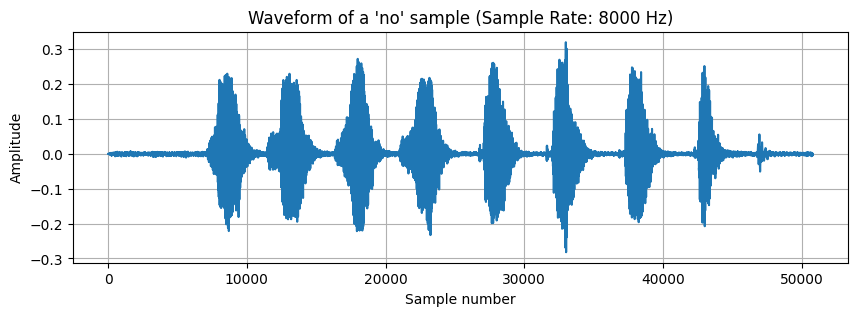


Generating and plotting Mel Spectrogram...


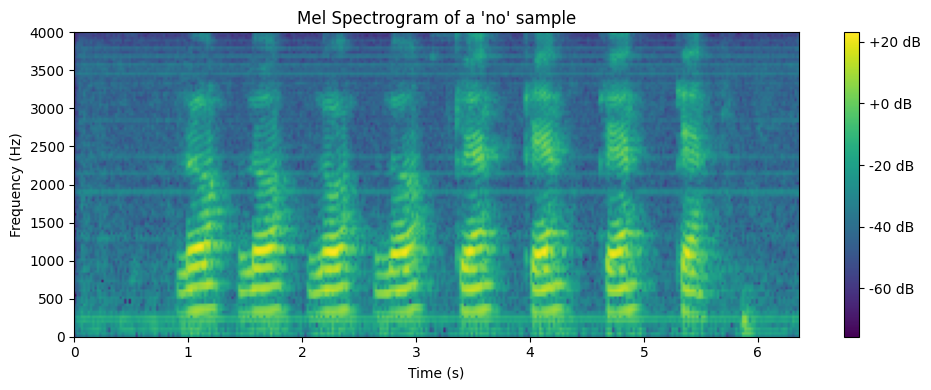


--- Iterating through a few more samples ---

Sample 1: Label='no', Sample Rate=8000, Waveform Shape=torch.Size([1, 54080])


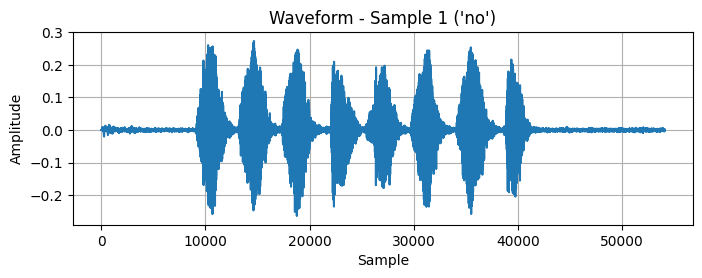


Sample 2: Label='no', Sample Rate=8000, Waveform Shape=torch.Size([1, 48880])


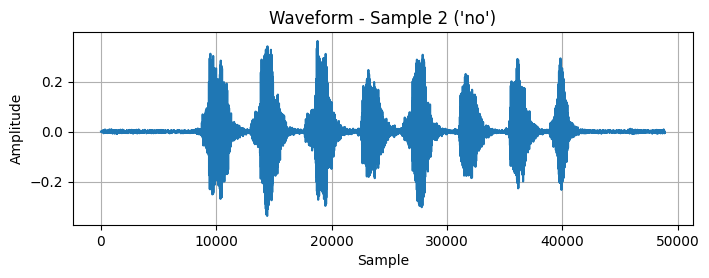


Sample 3: Label='no', Sample Rate=8000, Waveform Shape=torch.Size([1, 48560])


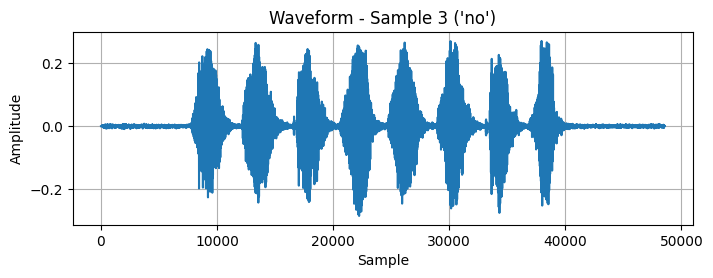


Cleaned up temporary directory: /tmp/tmpvbkmqah8


In [10]:
# 8. Audio Data: Loading and Inspecting YESNO dataset with Torchaudio

import torch
import torchaudio
import torchaudio.transforms as T
import matplotlib.pyplot as plt
from IPython.display import Audio # For playing audio in Colab/Jupyter

print(f"PyTorch version: {torch.__version__}")
print(f"Torchaudio version: {torchaudio.__version__}")

# Download and load the YESNO dataset
# It's a small dataset, so download should be quick.
# The dataset consists of 60 recordings of a person saying "yes" or "no" in Hebrew.
try:
    print("\nLoading YESNO dataset...")
    # Define the root directory for the dataset
    # Using a temporary directory for this example
    import tempfile
    temp_dir = tempfile.mkdtemp()
    dataset_yesno = torchaudio.datasets.YESNO(root=temp_dir, download=True)
    print(f"Dataset loaded. Number of samples: {len(dataset_yesno)}")
except Exception as e:
    print(f"Error loading YESNO dataset: {e}")
    print("Please ensure you have internet connectivity and torchaudio is correctly installed.")
    print("Skipping further YESNO dataset processing.")
    dataset_yesno = None # Set to None to skip processing if loading fails


if dataset_yesno:
    # Access a sample from the dataset
    # Each item is a tuple: (waveform, sample_rate, labels)
    # Labels are a list of 0s (no) and 1s (yes) for each utterance in the recording (usually one per file for YESNO)
    sample_index = 0
    waveform, sample_rate, labels = dataset_yesno[sample_index]

    print("\n--- Sample Information ---")
    print(f"Sample Index: {sample_index}")
    print(f"Waveform shape: {waveform.shape}") # Typically (num_channels, num_frames) -> (1, num_frames) for YESNO
    print(f"Sample Rate (Hz): {sample_rate}")
    print(f"Labels: {labels}") # List of [1] for "yes" or [0] for "no"

    # Convert label to human-readable string
    label_str = "yes" if labels[0] == 1 else "no"
    print(f"Utterance: '{label_str}'")

    # Play the audio sample (works in Colab/Jupyter)
    print("\nPlaying audio sample...")
    display(Audio(data=waveform.numpy(), rate=sample_rate))

    # Plot the waveform
    plt.figure(figsize=(10, 3))
    plt.plot(waveform.t().numpy()) # Transpose for plotting if shape is (1, num_frames)
    plt.title(f"Waveform of a '{label_str}' sample (Sample Rate: {sample_rate} Hz)")
    plt.xlabel("Sample number")
    plt.ylabel("Amplitude")
    plt.grid(True)
    plt.show()

    # Create and plot a Mel Spectrogram
    print("\nGenerating and plotting Mel Spectrogram...")
    n_fft = 400 # Number of FFT components
    hop_length = 160 # Hop length for STFT
    n_mels = 128 # Number of Mel bands

    mel_spectrogram_transform = T.MelSpectrogram(
        sample_rate=sample_rate,
        n_fft=n_fft,
        hop_length=hop_length,
        n_mels=n_mels
    )

    mel_spectrogram = mel_spectrogram_transform(waveform)
    # Convert to log scale (dB) for better visualization
    log_mel_spectrogram = T.AmplitudeToDB()(mel_spectrogram)

    plt.figure(figsize=(10, 4))
    plt.imshow(log_mel_spectrogram[0].numpy(), aspect='auto', origin='lower',
               extent=[0, log_mel_spectrogram.shape[2] * hop_length / sample_rate, 0, sample_rate / 2])
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Mel Spectrogram of a '{label_str}' sample")
    plt.xlabel("Time (s)")
    plt.ylabel("Frequency (Hz)")
    plt.tight_layout()
    plt.show()

    # Iterate through a few samples
    print("\n--- Iterating through a few more samples ---")
    for i in range(1, min(4, len(dataset_yesno))): # Show next 3 samples if available
        waveform_i, sr_i, labels_i = dataset_yesno[i]
        label_str_i = "yes" if labels_i[0] == 1 else "no"
        print(f"\nSample {i}: Label='{label_str_i}', Sample Rate={sr_i}, Waveform Shape={waveform_i.shape}")
        # display(Audio(data=waveform_i.numpy(), rate=sr_i)) # Optional: play each

        plt.figure(figsize=(8, 2.5))
        plt.plot(waveform_i.t().numpy())
        plt.title(f"Waveform - Sample {i} ('{label_str_i}')")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.grid(True)
        plt.show()

    # Clean up the temporary directory if it was created
    import shutil
    try:
        shutil.rmtree(temp_dir)
        print(f"\nCleaned up temporary directory: {temp_dir}")
    except Exception as e_clean:
        print(f"Error cleaning up temp directory: {e_clean}")

else:
    print("\nYESNO dataset was not loaded. Skipping inspection examples.")

In [1]:
!pip install av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 10.0 MB/s eta 0:00:00


TensorFlow Version: 2.18.0
Successfully configured 1 Physical GPU(s), 1 Logical GPU(s). Training will use the GPU (e.g., T4).


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.G5LWYG_3.0.1/mnist-train.tfrecord*...:   0%|          | 0…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/mnist/incomplete.G5LWYG_3.0.1/mnist-test.tfrecord*...:   0%|          | 0/…

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.

--- MNIST Dataset Information ---
Dataset name: mnist
Number of training examples: 60000
Number of testing examples: 10000
Image shape: (28, 28, 1)
Number of classes: 10

Data pipelines prepared.

Displaying example images from training set (first image from 5 batches)...


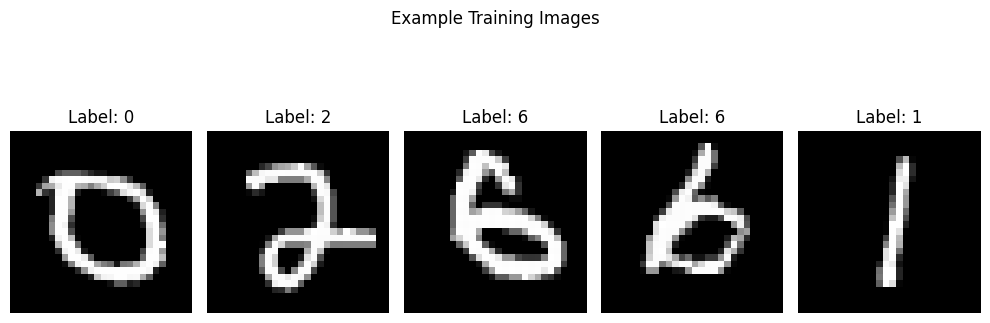

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Training the CNN model (will use T4 GPU if available)...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8453 - loss: 0.5249 - val_accuracy: 0.9821 - val_loss: 0.0571
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9778 - loss: 0.0721 - val_accuracy: 0.9882 - val_loss: 0.0366
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9854 - loss: 0.0473 - val_accuracy: 0.9888 - val_loss: 0.0318
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9893 - loss: 0.0362 - val_accuracy: 0.9901 - val_loss: 0.0288
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9918 - loss: 0.0267 - val_accuracy: 0.9910 - val_loss: 0.0277
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9921 - loss: 0.0244 - val_accuracy: 0.9900 - val_loss: 0.0256
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9945 - loss: 0.0193 - val_accuracy: 0.9904 - val_loss: 0.0257
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4

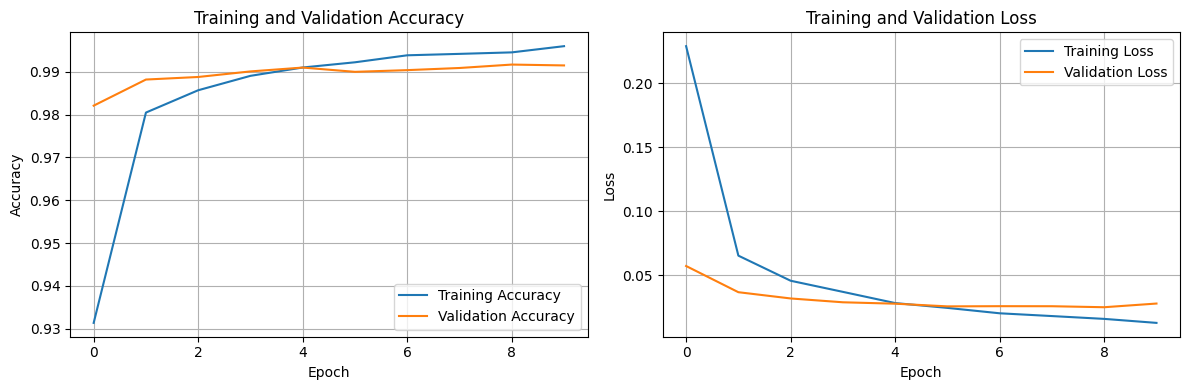


--- Example Predictions ---


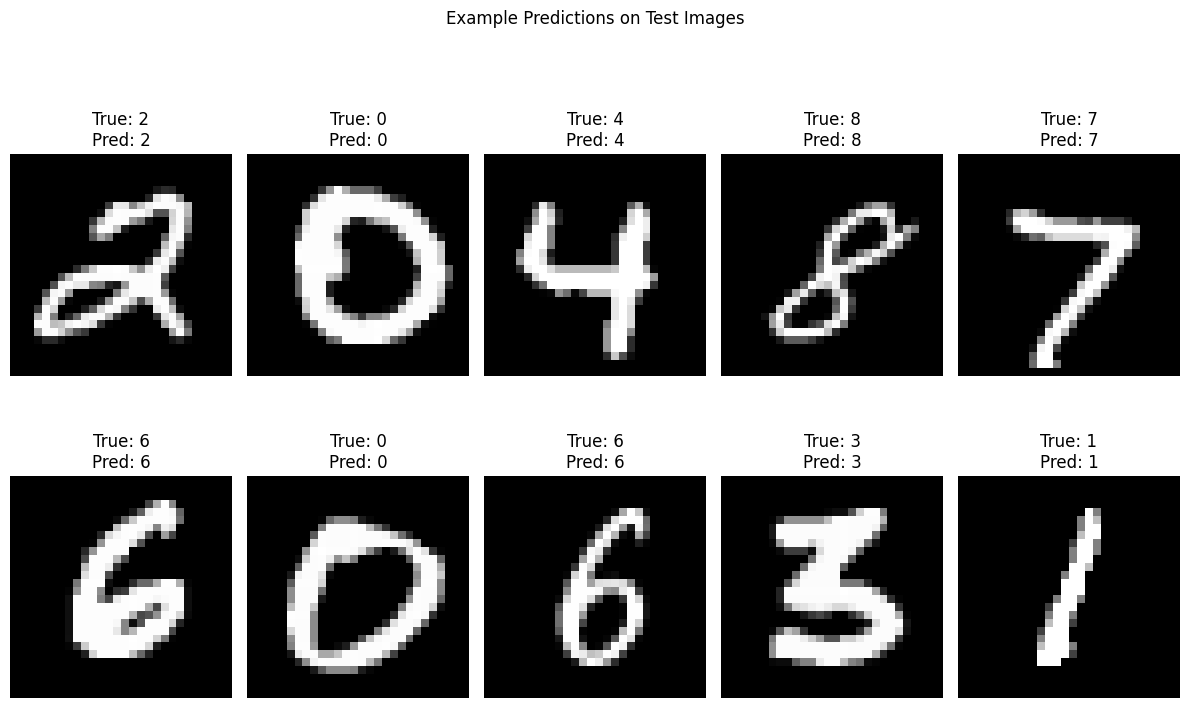

In [1]:
# 1. Import necessary libraries
import os # os is still imported but we won't force CPU
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

print(f"TensorFlow Version: {tf.__version__}")

# 2. Check for GPU availability (T4 should be detected)
# and configure memory growth for smoother operation.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        # You can often get more details about the GPU like this:
        # for physical_gpu in gpus:
        #     print(f"  Details: {tf.config.experimental.get_device_details(physical_gpu)}")
        print(f"Successfully configured {len(gpus)} Physical GPU(s), {len(logical_gpus)} Logical GPU(s). Training will use the GPU (e.g., T4).")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized,
        # or other runtime errors might occur.
        print(f"Error during GPU setup: {e}")
        print("Proceeding with default GPU behavior or CPU if GPU setup failed.")
else:
    print("No GPU detected by TensorFlow. Training will use the CPU.")
    print("If you intended to use a T4 GPU, please ensure your environment (e.g., Colab Runtime type) is correctly configured.")


# 3. Load the MNIST dataset
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,  # Returns (image, label) tuples
    with_info=True       # Provides metadata about the dataset
)

print("\n--- MNIST Dataset Information ---")
print(f"Dataset name: {ds_info.name}")
print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of testing examples: {ds_info.splits['test'].num_examples}")
print(f"Image shape: {ds_info.features['image'].shape}")
print(f"Number of classes: {ds_info.features['label'].num_classes}")


# 4. Preprocessing function
def normalize_img(image, label):
    """Normalizes images: `uint8` -> `float32`."""
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# 5. Prepare the training dataset
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128) # Batch size can be increased on a T4, e.g., 256 or 512
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# 6. Prepare the testing dataset
ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128) # Consider matching training batch size for consistency
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

print("\nData pipelines prepared.")

# 7. Display some example images from the training set
plt.figure(figsize=(10, 4))
print("\nDisplaying example images from training set (first image from 5 batches)...")
for i, (image_batch, label_batch) in enumerate(ds_train.take(5)):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(image_batch[0].numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {label_batch[0].numpy()}")
    plt.axis('off')
plt.suptitle("Example Training Images")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 8. Define the Keras CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 9. Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')]
)

model.summary()

# 10. Train the model (this will run on GPU if detected)
print("\nTraining the CNN model (will use T4 GPU if available)...")
history = model.fit(
    ds_train,
    epochs=10,
    validation_data=ds_test
)
print("Model training complete.")

# 11. Evaluate the model on the test set
print("\n--- Model Evaluation ---")
eval_loss, eval_accuracy = model.evaluate(ds_test, verbose=0)
print(f"Test Loss: {eval_loss:.4f}")
print(f"Test Accuracy: {eval_accuracy:.4f}")

# 12. Plot training history (accuracy and loss)
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# 13. Make predictions on a few test images
print("\n--- Example Predictions ---")
plt.figure(figsize=(12, 8))
num_predictions = 10
for i, (image, label) in enumerate(ds_test.unbatch().take(num_predictions)):
    ax = plt.subplot(2, 5, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap='gray')

    img_array = tf.expand_dims(image, 0)
    predictions_single = model.predict(img_array, verbose=0)
    predicted_label = np.argmax(predictions_single[0])

    plt.title(f"True: {label.numpy()}\nPred: {predicted_label}")
    plt.axis('off')

plt.suptitle("Example Predictions on Test Images")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()